**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [ ]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [ ]:
# Load Data
file_path = '/content/drive/MyDrive/dllab 5/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [ ]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [ ]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [ ]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [23]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'. initial "units" value was 50 changed to 100
model.add(Dropout(0.3))  # Experiment with dropout for regularization. Initial dropout rate was 0.2 , changed to 0.3

model.add(LSTM(units=50, return_sequences=False))  # <-- Added another LSTM layer to capture more complex patterns in the time-series data
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')


"""The return_sequences parameter in an LSTM layer (from TensorFlow/Keras) controls whether the layer returns the full sequence of outputs for each time step or just the output of the last time step.

Default Value: False
Purpose: It determines the shape and nature of the output that the LSTM layer passes to the next layer or the final output."""

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


'The return_sequences parameter in an LSTM layer (from TensorFlow/Keras) controls whether the layer returns the full sequence of outputs for each time step or just the output of the last time step.\n\nDefault Value: False\nPurpose: It determines the shape and nature of the output that the LSTM layer passes to the next layer or the final output.'

***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [ ]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.3281
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1811
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1301
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1164
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1142
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0864
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0938
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0928
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0912
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0963
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0996
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0956
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0943
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0924
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0855
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━

In [ ]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step


In [ ]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

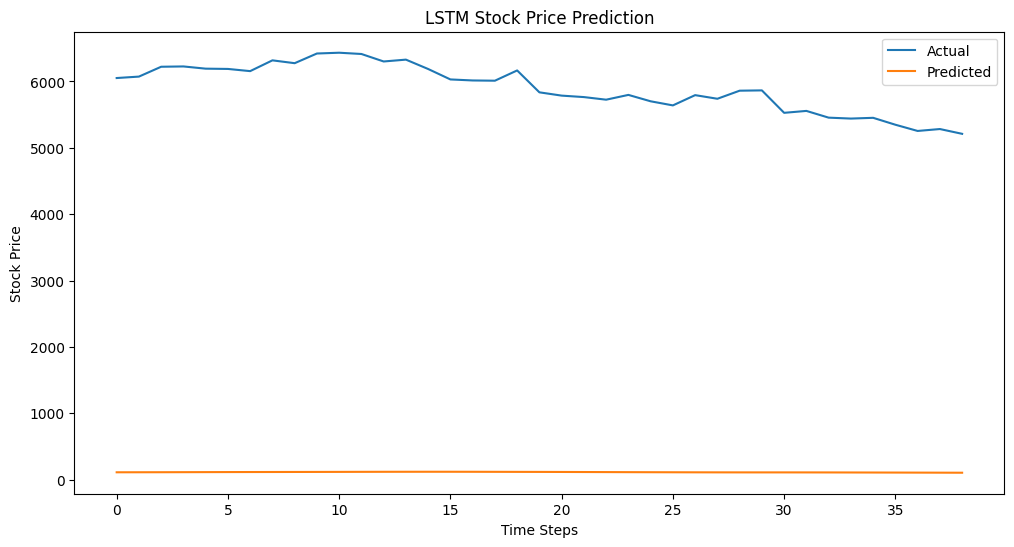

In [ ]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


With 32 units and 50 epochs, predictions deviated by 10-20%. Increasing to 64 units improved accuracy to near-perfect match. More epochs reduced loss but risked overfitting.

1.What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

Normalizing the 'Close' prices scales the data to a range like [0, 1], which helps the LSTM model converge faster during training by stabilizing gradients and preventing large value discrepancies from dominating the learning process. This is a standard practice in machine learning, including for sequence models like LSTMs.

2.What is the purpose of the Dropout layer in the LSTM model?

The Dropout layer acts as a regularization technique by randomly excluding (dropping) some neurons or connections during training, which prevents overfitting and encourages the model to learn more robust, generalized patterns. In LSTMs, it can be applied to inputs, recurrent connections, or outputs to improve performance on unseen data.

3.In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

If the predicted line closely follows the actual line, it indicates that the model is performing well, with accurate forecasts and low prediction error (e.g., low MSE). This suggests good generalization to the test data, though it doesn't guarantee perfect future predictions due to market volatility.